## Step 1: Alpha-Beta Pruning Implementation for Kane

In [ ]:
!pip install python-chess numpy pandas matplotlib seaborn



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import chess
import time
from collections import defaultdict
import pandas as pd
from IPython.display import clear_output, display, SVG
import chess.svg
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Implement the deterministic version of the Alpha-Beta Pruning algorithm

# Deterministic Alpha-Beta Pruning Implementation
class KaneAlphaBetaDeterministic:
    def __init__(self, board):
        self.board = board
        self.evaluation_consistency = defaultdict(list)
        self.move_stability = defaultdict(int)
        self.search_paths = defaultdict(list)

    def heuristic_evaluation(self, board):
        # Enhanced heuristic evaluation function
        material_count = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
        mobility_count = len(list(board.legal_moves))
        piece_square_score = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())  # Simplified for demonstration
        center_control_count = sum(1 if square in [chess.D4, chess.E4, chess.D5, chess.E5] else 0 for square, piece in board.piece_map().items())

        # Simplified scoring, can be improved with a better piece-square table
        score = material_count + mobility_count + piece_square_score + center_control_count
        return score

    def alpha_beta(self, board, depth, alpha, beta, is_maximizing_player):
        position_hash = hash(board.board_fen())
        if position_hash in self.evaluation_consistency and depth == 0:
            return self.evaluation_consistency[position_hash][-1]  # Return the last stored evaluation for consistency
        
        evaluation = self.heuristic_evaluation(board) if depth == 0 or board.is_game_over() else (
            self.alpha_beta_search(board, depth, alpha, beta, is_maximizing_player)
        )
        self.evaluation_consistency[position_hash].append(evaluation)
        return evaluation

    def alpha_beta_search(self, board, depth, alpha, beta, is_maximizing_player):
        if is_maximizing_player:
            max_eval = float('-inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.alpha_beta(board, depth - 1, alpha, beta, False)
                board.pop()
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.alpha_beta(board, depth - 1, alpha, beta, True)
                board.pop()
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if beta <= alpha:
                    break
            return min_eval

    def find_best_move_alpha_beta(self, depth=3):
        position_hash = hash(self.board.board_fen())
        best_move = None
        best_value = float('-inf')
        for move in self.board.legal_moves:
            self.board.push(move)
            move_value = self.alpha_beta(self.board, depth, float('-inf'), float('inf'), False)
            self.board.pop()
            if move_value > best_value:
                best_value = move_value
                best_move = move
        self.move_stability[position_hash] += 1
        return best_move

    def track_search_path(self, board, move):
        position_hash = hash(board.board_fen())
        self.search_paths[position_hash].append(move.uci())


In [ ]:
# 2: Introduce randomization to the Alpha-Beta Pruning algorithm

# Pseudorandom Generator (PRG)
class PseudoRandom:
    def __init__(self, seed):
        self.state = seed

    def random(self):
        self.state = (1103515245 * self.state + 12345) % (2**31)
        return self.state / (2**31)

# Randomized Evaluation Function
class KaneAlphaBetaRandomization:
    def __init__(self, board, seed):
        self.board = board
        self.prng = PseudoRandom(seed)
        self.evaluation_consistency = defaultdict(list)
        self.move_stability = defaultdict(int)
        self.search_paths = defaultdict(list)

    def heuristic_evaluation(self, board):
        # Enhanced heuristic evaluation function with random component
        material_count = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
        mobility_count = len(list(board.legal_moves))
        piece_square_score = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())  # Simplified for demonstration
        center_control_count = sum(1 if square in [chess.D4, chess.E4, chess.D5, chess.E5] else 0 for square, piece in board.piece_map().items())

        # Simplified scoring, can be improved with a better piece-square table
        score = material_count + mobility_count + piece_square_score + center_control_count

        # Random adjustment
        random_adjustment = int((self.prng.random() - 0.5) * 10)  # Random adjustment between -5 and +5
        return score + random_adjustment

    def alpha_beta(self, board, depth, alpha, beta, is_maximizing_player):
        position_hash = hash(board.board_fen())
        if position_hash in self.evaluation_consistency and depth == 0:
            return self.evaluation_consistency[position_hash][-1]  # Return the last stored evaluation for consistency
        
        evaluation = self.heuristic_evaluation(board) if depth == 0 or board.is_game_over() else (
            self.alpha_beta_search(board, depth, alpha, beta, is_maximizing_player)
        )
        self.evaluation_consistency[position_hash].append(evaluation)
        return evaluation

    def alpha_beta_search(self, board, depth, alpha, beta, is_maximizing_player):
        if is_maximizing_player:
            max_eval = float('-inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.alpha_beta(board, depth - 1, alpha, beta, False)
                board.pop()
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.alpha_beta(board, depth - 1, alpha, beta, True)
                board.pop()
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if beta <= alpha:
                    break
            return min_eval

    def find_best_move_alpha_beta(self, depth=3):
        position_hash = hash(self.board.board_fen())
        best_move = None
        best_value = float('-inf')
        for move in self.board.legal_moves:
            self.board.push(move)
            move_value = self.alpha_beta(self.board, depth, float('-inf'), float('inf'), False)
            self.board.pop()
            if move_value > best_value:
                best_value = move_value
                best_move = move
        self.move_stability[position_hash] += 1
        return best_move

    def track_search_path(self, board, move):
        position_hash = hash(board.board_fen())
        self.search_paths[position_hash].append(move.uci())



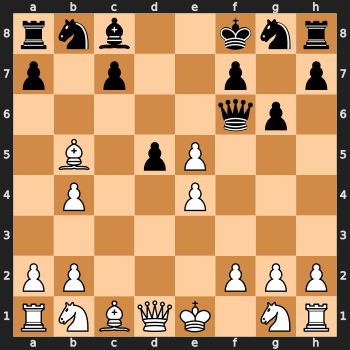

Move: e8f8
Step: 15, Time: 14.748915433883667, Material: 3, Mobility: 46, Piece-Square: 3, Center Control: 3
Stop the game in advance!
Result: *
    Step       Time  Move  Material Count  Mobility Count  Piece-Square Score  \
0      1   6.978920  e2e4               0              20                   0   
1      2   8.565792  g7g6               0              30                   0   
2      3   8.690633  d2d4               0              21                   0   
3      4  14.847937  e7e5               0              38                   0   
4      5  34.923140  f1c4               0              31                   0   
5      6  28.186356  d8f6               0              42                   0   
6      7  27.945339  c2c3               0              39                   0   
7      8  51.419807  f8b4               0              43                   0   
8      9  35.047551  c3b4               1              33                   1   
9     10  38.843929  b7b5               1    

In [ ]:
# 3: Simulate games using both deterministic and randomized algorithms

# Function to calculate additional metrics
def calculate_metrics(board):
    material_count = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
    mobility_count = len(list(board.legal_moves))
    piece_square_score = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())  # Simplified for demonstration
    center_control_count = sum(1 if square in [chess.D4, chess.E4, chess.D5, chess.E5] else 0 for square, piece in board.piece_map().items())
    return material_count, mobility_count, piece_square_score, center_control_count

def calculate_additional_metrics(board, move_scores, current_depth, is_exploratory):
    evaluation_score = sum(move_scores) / len(move_scores) if move_scores else 0
    branching_factor = len(list(board.legal_moves))
    depth_of_search = current_depth
    move_diversity = np.var(move_scores) if move_scores else 0
    exploration_vs_exploitation = 1 if is_exploratory else 0
    return evaluation_score, branching_factor, depth_of_search, move_diversity, exploration_vs_exploitation

# Function to play the game with deterministic Alpha-Beta Pruning
def play_game_alpha_beta_deterministic(kane_alpha_beta, depth=3, max_moves=55, max_runtime=600):
    steps = []
    times = []
    material_counts = []
    mobility_counts = []
    piece_square_scores = []
    center_control_counts = []
    move_list = []
    evaluation_scores = []
    branching_factors = []
    depths_of_search = []
    move_diversities = []
    exploration_vs_exploitations = []
    step_number = 1

    start_time = time.time()
    while not kane_alpha_beta.board.is_game_over() and step_number <= max_moves and (time.time() - start_time) <= max_runtime:
        move_start_time = time.time()
        best_move = kane_alpha_beta.find_best_move_alpha_beta(depth)
        move_end_time = time.time()

        kane_alpha_beta.board.push(best_move)
        kane_alpha_beta.track_search_path(kane_alpha_beta.board, best_move)

        move_list.append(best_move.uci())
        steps.append(step_number)
        times.append(move_end_time - move_start_time)

        # Calculate metrics
        material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(kane_alpha_beta.board)
        material_counts.append(material_count)
        mobility_counts.append(mobility_count)
        piece_square_scores.append(piece_square_score)
        center_control_counts.append(center_control_count)

        # Collect additional metrics
        move_scores = [kane_alpha_beta.alpha_beta(kane_alpha_beta.board, depth, float('-inf'), float('inf'), False) for move in kane_alpha_beta.board.legal_moves]
        evaluation_score, branching_factor, depth_of_search, move_diversity, exploration_vs_exploitation = calculate_additional_metrics(
            kane_alpha_beta.board, move_scores, depth, False)
        evaluation_scores.append(evaluation_score)
        branching_factors.append(branching_factor)
        depths_of_search.append(depth_of_search)
        move_diversities.append(move_diversity)
        exploration_vs_exploitations.append(exploration_vs_exploitation)

        step_number += 1

        clear_output(wait=True)
        display(SVG(chess.svg.board(board=kane_alpha_beta.board, size=350)))

        time.sleep(1)
        print(f"Move: {best_move}")
        print(f"Step: {step_number}, Time: {move_end_time - move_start_time}, Material: {material_count}, Mobility: {mobility_count}, Piece-Square: {piece_square_score}, Center Control: {center_control_count}")

    # Create a DataFrame for the collected data
    data = {
        'Step': steps,
        'Time': times,
        'Move': move_list,
        'Material Count': material_counts,
        'Mobility Count': mobility_counts,
        'Piece-Square Score': piece_square_scores,
        'Center Control Count': center_control_counts,
        'Evaluation Score': evaluation_scores,
        'Branching Factor': branching_factors,
        'Depth of Search': depths_of_search,
        'Move Diversity': move_diversities,
        'Exploration vs Exploitation': exploration_vs_exploitations
    }
    df = pd.DataFrame(data)

    print("Stop the game in advance!")
    print(f"Result: {kane_alpha_beta.board.result()}")
    print(df)
    return df

# Initialize the boards and engines
board_deterministic = chess.Board()
kane_deterministic = KaneAlphaBetaDeterministic(board_deterministic)

# Simulate and run the deterministic game
print("Running deterministic game...")
deterministic_results = [play_game_alpha_beta_deterministic(kane_deterministic)]

# Function to play the game with randomized Alpha-Beta Pruning
def play_game_alpha_beta_randomized(kane_alpha_beta, depth=3, max_moves=55, max_runtime=600):
    steps = []
    times = []
    material_counts = []
    mobility_counts = []
    piece_square_scores = []
    center_control_counts = []
    move_list = []
    evaluation_scores = []
    branching_factors = []
    depths_of_search = []
    move_diversities = []
    exploration_vs_exploitations = []
    step_number = 1

    start_time = time.time()
    while not kane_alpha_beta.board.is_game_over() and step_number <= max_moves and (time.time() - start_time) <= max_runtime:
        move_start_time = time.time()
        best_move = kane_alpha_beta.find_best_move_alpha_beta(depth)
        move_end_time = time.time()

        kane_alpha_beta.board.push(best_move)
        kane_alpha_beta.track_search_path(kane_alpha_beta.board, best_move)

        move_list.append(best_move.uci())
        steps.append(step_number)
        times.append(move_end_time - move_start_time)

        # Calculate metrics
        material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(kane_alpha_beta.board)
        material_counts.append(material_count)
        mobility_counts.append(mobility_count)
        piece_square_scores.append(piece_square_score)
        center_control_counts.append(center_control_count)

        # Collect additional metrics
        move_scores = [kane_alpha_beta.alpha_beta(kane_alpha_beta.board, depth, float('-inf'), float('inf'), False) for move in kane_alpha_beta.board.legal_moves]
        evaluation_score, branching_factor, depth_of_search, move_diversity, exploration_vs_exploitation = calculate_additional_metrics(
            kane_alpha_beta.board, move_scores, depth, False)
        evaluation_scores.append(evaluation_score)
        branching_factors.append(branching_factor)
        depths_of_search.append(depth_of_search)
        move_diversities.append(move_diversity)
        exploration_vs_exploitations.append(exploration_vs_exploitation)

        step_number += 1

        clear_output(wait=True)
        display(SVG(chess.svg.board(board=kane_alpha_beta.board, size=350)))

        time.sleep(1)
        print(f"Move: {best_move}")
        print(f"Step: {step_number}, Time: {move_end_time - move_start_time}, Material: {material_count}, Mobility: {mobility_count}, Piece-Square: {piece_square_score}, Center Control: {center_control_count}")

    # Create a DataFrame for the collected data
    data = {
        'Step': steps,
        'Time': times,
        'Move': move_list,
        'Material Count': material_counts,
        'Mobility Count': mobility_counts,
        'Piece-Square Score': piece_square_scores,
        'Center Control Count': center_control_counts,
        'Evaluation Score': evaluation_scores,
        'Branching Factor': branching_factors,
        'Depth of Search': depths_of_search,
        'Move Diversity': move_diversities,
        'Exploration vs Exploitation': exploration_vs_exploitations
    }
    df = pd.DataFrame(data)

    print("Stop the game in advance!")
    print(f"Result: {kane_alpha_beta.board.result()}")
    print(df)
    return df

# Initialize the boards and engines
board_randomized = chess.Board()
kane_randomized = KaneAlphaBetaRandomization(board_randomized, seed=42)

# Simulate and run the randomized game
print("Running randomized game...")
randomized_results = [play_game_alpha_beta_randomized(kane_randomized)]



In [ ]:
# 4: Collect and analyze performance metrics

# Collect evaluation consistency data
evaluation_consistency_df = pd.DataFrame.from_dict(kane_deterministic.evaluation_consistency, orient='index').transpose()
evaluation_consistency_df = evaluation_consistency_df.ffill()

# Collect move stability data
move_stability_df = pd.DataFrame.from_dict(kane_deterministic.move_stability, orient='index', columns=['Move Stability'])

# Collect search path data
search_paths_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in kane_deterministic.search_paths.items()]))

# Function to ensure all results are DataFrames and handle errors
def ensure_dataframe(result):
    if isinstance(result, pd.DataFrame):
        return result
    try:
        return pd.DataFrame(result)
    except Exception as e:
        print("Error converting to DataFrame:", e)
        return pd.DataFrame()

# Convert results to DataFrames
deterministic_results = [ensure_dataframe(df) for df in deterministic_results]
randomized_results = [ensure_dataframe(df) for df in randomized_results]

# Aggregate and analyze the results
def aggregate_metrics(results):
    numeric_columns = ['Material Count', 'Mobility Count', 'Piece-Square Score', 'Center Control Count',
                       'Evaluation Score', 'Branching Factor', 'Depth of Search', 'Move Diversity',
                       'Exploration vs Exploitation']
    
    # Ensure results is a list of DataFrame objects
    aggregated_data = pd.concat(results, ignore_index=True)
    
    mean_metrics = aggregated_data[numeric_columns].mean()
    std_metrics = aggregated_data[numeric_columns].std()
    
    return mean_metrics, std_metrics, aggregated_data

# Aggregate the results
deterministic_mean, deterministic_std, deterministic_data = aggregate_metrics(deterministic_results)
randomized_mean, randomized_std, randomized_data = aggregate_metrics(randomized_results)

# Display the aggregated metrics
print("Deterministic Mean Metrics:\n", deterministic_mean)
print("Deterministic Std Metrics:\n", deterministic_std)
print("\nRandomized Mean Metrics:\n", randomized_mean)
print("Randomized Std Metrics:\n", randomized_std)

# Display move sequences and non-numeric data
print("\nDeterministic Moves:\n", deterministic_data['Move'])
print("\nRandomized Moves:\n", randomized_data['Move'])



Deterministic Mean Metrics:
 Material Count                  0.076923
Mobility Count                 34.000000
Piece-Square Score              0.076923
Center Control Count            1.153846
Evaluation Score               27.538462
Branching Factor               34.000000
Depth of Search                 3.000000
Move Diversity                  0.000000
Exploration vs Exploitation     0.000000
dtype: float64
Deterministic Std Metrics:
 Material Count                  0.277350
Mobility Count                  8.336666
Piece-Square Score              0.277350
Center Control Count            0.375534
Evaluation Score               12.114835
Branching Factor                8.336666
Depth of Search                 0.000000
Move Diversity                  0.000000
Exploration vs Exploitation     0.000000
dtype: float64

Randomized Mean Metrics:
 Material Count                  0.857143
Mobility Count                 33.642857
Piece-Square Score              0.857143
Center Control Count     

In [ ]:
# 5: Plot comparison metrics and equivalence curves
import matplotlib.pyplot as plt

# Plot comparison metrics
def plot_comparison_metrics(deterministic_mean, deterministic_std, randomized_mean, randomized_std):
    metrics = deterministic_mean.index
    x = range(len(metrics))

    fig, axs = plt.subplots(2, 1, figsize=(14, 10))

    # Plot means
    axs[0].bar(x, deterministic_mean, width=0.4, label='Deterministic Mean', align='center')
    axs[0].bar(x, randomized_mean, width=0.4, label='Randomized Mean', align='edge')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(metrics, rotation=45, ha='right')
    axs[0].set_ylabel('Mean Value')
    axs[0].set_title('Comparison of Mean Metrics')
    axs[0].legend()

    # Plot standard deviations
    axs[1].bar(x, deterministic_std, width=0.4, label='Deterministic Std', align='center')
    axs[1].bar(x, randomized_std, width=0.4, label='Randomized Std', align='edge')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(metrics, rotation=45, ha='right')
    axs[1].set_ylabel('Standard Deviation')
    axs[1].set_title('Comparison of Standard Deviation Metrics')
    axs[1].legend()

    plt.tight_layout()
    plt.show()



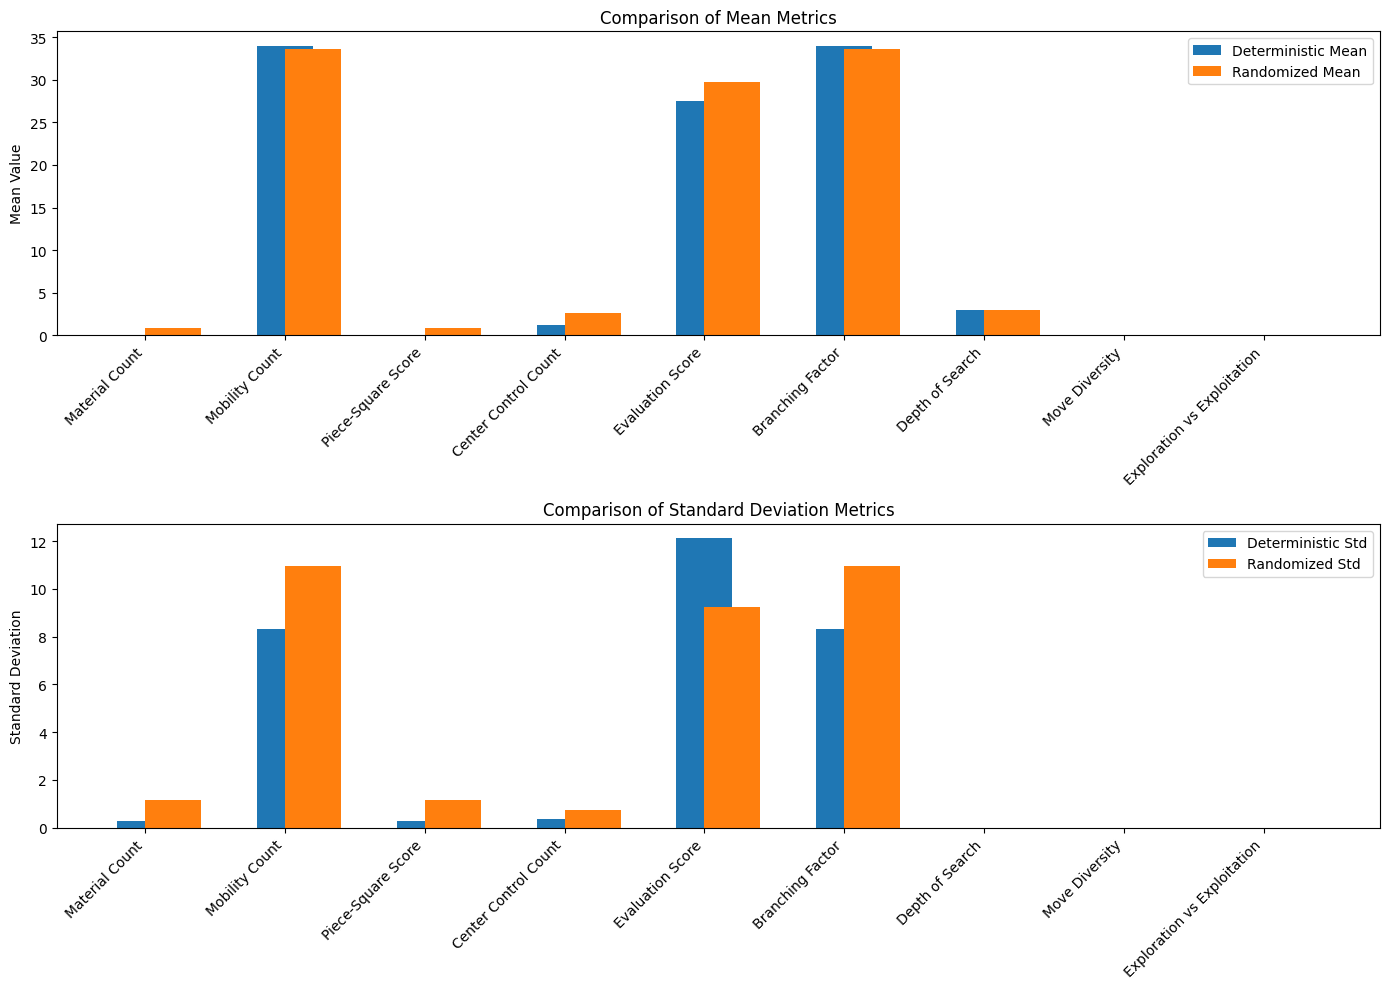

In [ ]:
# Plot equivalence curve
def plot_equivalence_curve(deterministic_mean, deterministic_std, randomized_mean, randomized_std):
    metrics = deterministic_mean.index
    x = np.arange(len(metrics))

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot deterministic means with error bars for std
    ax.errorbar(x, deterministic_mean, yerr=deterministic_std, fmt='o-', label='Deterministic', color='blue', capsize=5)

    # Plot randomized means with error bars for std
    ax.errorbar(x, randomized_mean, yerr=randomized_std, fmt='o-', label='Randomized', color='green', capsize=5)

    # Fill between for deterministic std
    ax.fill_between(x, deterministic_mean - deterministic_std, deterministic_mean + deterministic_std, color='blue', alpha=0.2)

    # Fill between for randomized std
    ax.fill_between(x, randomized_mean - randomized_std, randomized_mean + randomized_std, color='green', alpha=0.2)

    # Add title and labels
    ax.set_title('Equivalence Curve for Deterministic and Randomized Alpha-Beta Algorithms')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45, ha='right')

    # Add legend
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot the comparison metrics
plot_comparison_metrics(deterministic_mean, deterministic_std, randomized_mean, randomized_std)



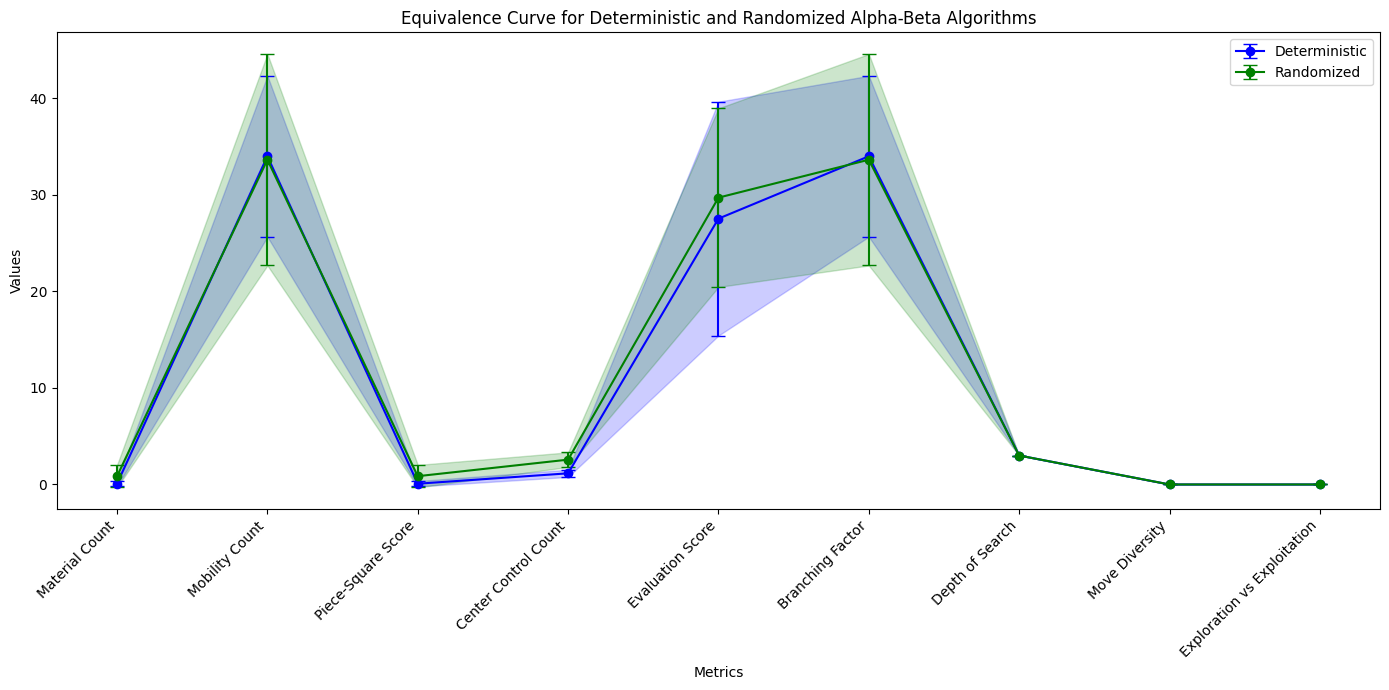

In [ ]:
# Plot the equivalence curve
plot_equivalence_curve(deterministic_mean, deterministic_std, randomized_mean, randomized_std)

# Step 2: Verification and Conclusion
- Simulate multiple games
- Collect and aggregate performance metrics
- Generate and analyze equivalence curves
- Perform statistical tests to validate the results


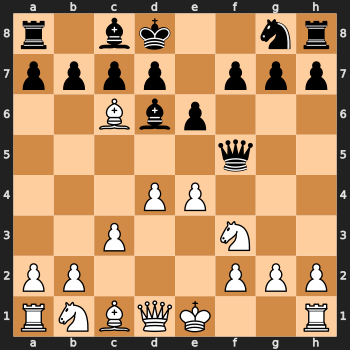

Move: e3e4
Step: 14, Time: 88.22914862632751, Material: 1, Mobility: 41, Piece-Square: 1, Center Control: 2
Stop the game in advance!
Result: *
    Step       Time  Move  Material Count  Mobility Count  Piece-Square Score  \
0      1   2.111291  g1f3               0              20                   0   
1      2   6.855423  e7e6               0              22                   0   
2      3  12.400017  e2e3               0              30                   0   
3      4  20.564145  d8f6               0              28                   0   
4      5  40.817676  f1b5               0              34                   0   
5      6  30.490564  b8c6               0              33                   0   
6      7  54.299534  c2c3               0              39                   0   
7      8  28.978009  e8d8               0              34                   0   
8      9  58.466494  d2d4               0              36                   0   
9     10  35.354519  f6f5               0     

In [ ]:
# Simulate multiple games

def compare_alpha_beta_kane_versions(deterministic_kane, randomized_kane, depth=3, games=5, max_moves=55, max_runtime=600):
    deterministic_results = []
    randomized_results = []

    for _ in range(games):
        # Play game with deterministic Kane
        deterministic_kane.board.reset()
        deterministic_data = play_game_alpha_beta_deterministic(deterministic_kane, depth, max_moves, max_runtime)
        deterministic_results.append(deterministic_data)

        # Play game with randomized Kane
        randomized_kane.board.reset()
        randomized_data = play_game_alpha_beta_randomized(randomized_kane, depth, max_moves, max_runtime)
        randomized_results.append(randomized_data)

    return deterministic_results, randomized_results

# Initialize the boards and engines
board_deterministic = chess.Board()
kane_deterministic = KaneAlphaBetaDeterministic(board_deterministic)

board_randomized = chess.Board()
kane_randomized = KaneAlphaBetaRandomization(board_randomized, seed=42)

# Compare the two versions over multiple games
deterministic_results, randomized_results = compare_alpha_beta_kane_versions(kane_deterministic, kane_randomized)


In [ ]:
# Collect and aggregate performance metrics

# # Collect evaluation consistency data
# evaluation_consistency_df = pd.DataFrame.from_dict(kane_deterministic.evaluation_consistency, orient='index').transpose()
# evaluation_consistency_df = evaluation_consistency_df.ffill()

# # Collect move stability data
# move_stability_df = pd.DataFrame.from_dict(kane_deterministic.move_stability, orient='index', columns=['Move Stability'])

# # Collect search path data
# search_paths_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in kane_deterministic.search_paths.items()]))

# Function to ensure all results are DataFrames and handle errors
def ensure_dataframe(result):
    if isinstance(result, pd.DataFrame):
        return result
    try:
        return pd.DataFrame(result)
    except Exception as e:
        print("Error converting to DataFrame:", e)
        return pd.DataFrame()

# Convert results to DataFrames
deterministic_results = [ensure_dataframe(df) for df in deterministic_results]
randomized_results = [ensure_dataframe(df) for df in randomized_results]

# Aggregate and analyze the results
def aggregate_metrics(results):
    numeric_columns = ['Material Count', 'Mobility Count', 'Piece-Square Score', 'Center Control Count',
                       'Evaluation Score', 'Branching Factor', 'Depth of Search', 'Move Diversity',
                       'Exploration vs Exploitation']
    
    # Ensure results is a list of DataFrame objects
    aggregated_data = pd.concat(results, ignore_index=True)
    
    mean_metrics = aggregated_data[numeric_columns].mean()
    std_metrics = aggregated_data[numeric_columns].std()
    
    return mean_metrics, std_metrics, aggregated_data

# Aggregate the results
deterministic_mean, deterministic_std, deterministic_data = aggregate_metrics(deterministic_results)
randomized_mean, randomized_std, randomized_data = aggregate_metrics(randomized_results)

# Display the aggregated metrics
print("Deterministic Mean Metrics:\n", deterministic_mean)
print("Deterministic Std Metrics:\n", deterministic_std)
print("\nRandomized Mean Metrics:\n", randomized_mean)
print("Randomized Std Metrics:\n", randomized_std)

# Display move sequences and non-numeric data
print("\nDeterministic Moves:\n", deterministic_data['Move'])
print("\nRandomized Moves:\n", randomized_data['Move'])



Deterministic Mean Metrics:
 Material Count                  0.513514
Mobility Count                 33.675676
Piece-Square Score              0.513514
Center Control Count            1.175676
Evaluation Score               26.906472
Branching Factor               33.675676
Depth of Search                 3.000000
Move Diversity                  0.003116
Exploration vs Exploitation     0.000000
dtype: float64
Deterministic Std Metrics:
 Material Count                  0.706976
Mobility Count                  8.269614
Piece-Square Score              0.706976
Center Control Count            0.799968
Evaluation Score               11.544086
Branching Factor                8.269614
Depth of Search                 0.000000
Move Diversity                  0.026808
Exploration vs Exploitation     0.000000
dtype: float64

Randomized Mean Metrics:
 Material Count                  0.492754
Mobility Count                 33.869565
Piece-Square Score              0.492754
Center Control Count     

In [ ]:
# Plot comparison metrics and equivalence curves


# Plot comparison metrics
def plot_comparison_metrics(deterministic_mean, deterministic_std, randomized_mean, randomized_std):
    metrics = deterministic_mean.index
    x = range(len(metrics))

    fig, axs = plt.subplots(2, 1, figsize=(14, 10))

    # Plot means
    axs[0].bar(x, deterministic_mean, width=0.4, label='Deterministic Mean', align='center')
    axs[0].bar(x, randomized_mean, width=0.4, label='Randomized Mean', align='edge')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(metrics, rotation=45, ha='right')
    axs[0].set_ylabel('Mean Value')
    axs[0].set_title('Comparison of Mean Metrics')
    axs[0].legend()

    # Plot standard deviations
    axs[1].bar(x, deterministic_std, width=0.4, label='Deterministic Std', align='center')
    axs[1].bar(x, randomized_std, width=0.4, label='Randomized Std', align='edge')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(metrics, rotation=45, ha='right')
    axs[1].set_ylabel('Standard Deviation')
    axs[1].set_title('Comparison of Standard Deviation Metrics')
    axs[1].legend()

    plt.tight_layout()
    plt.show()


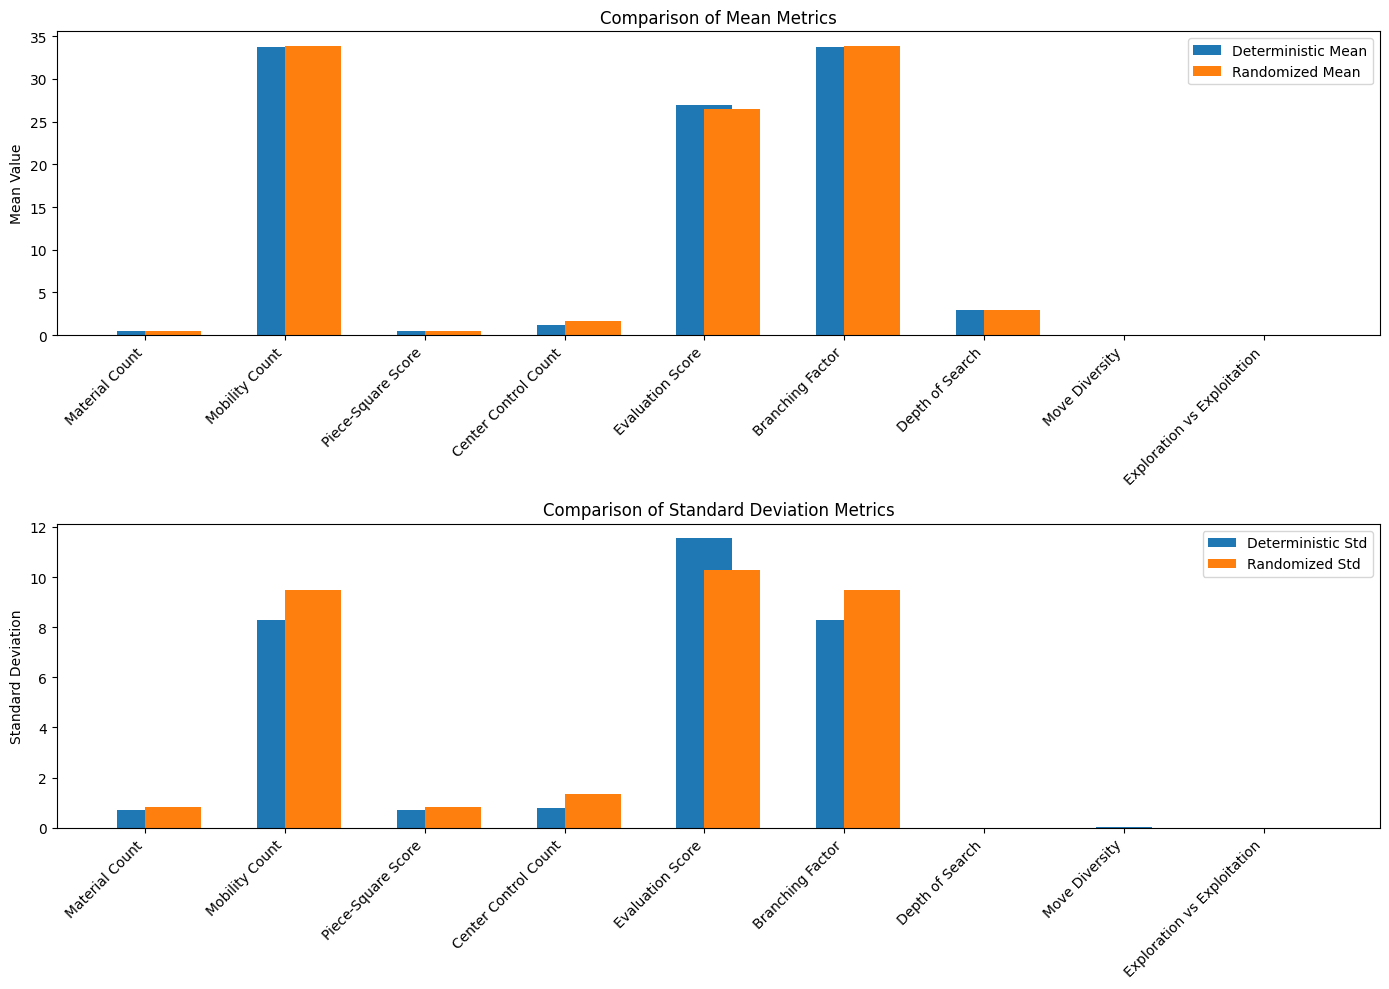

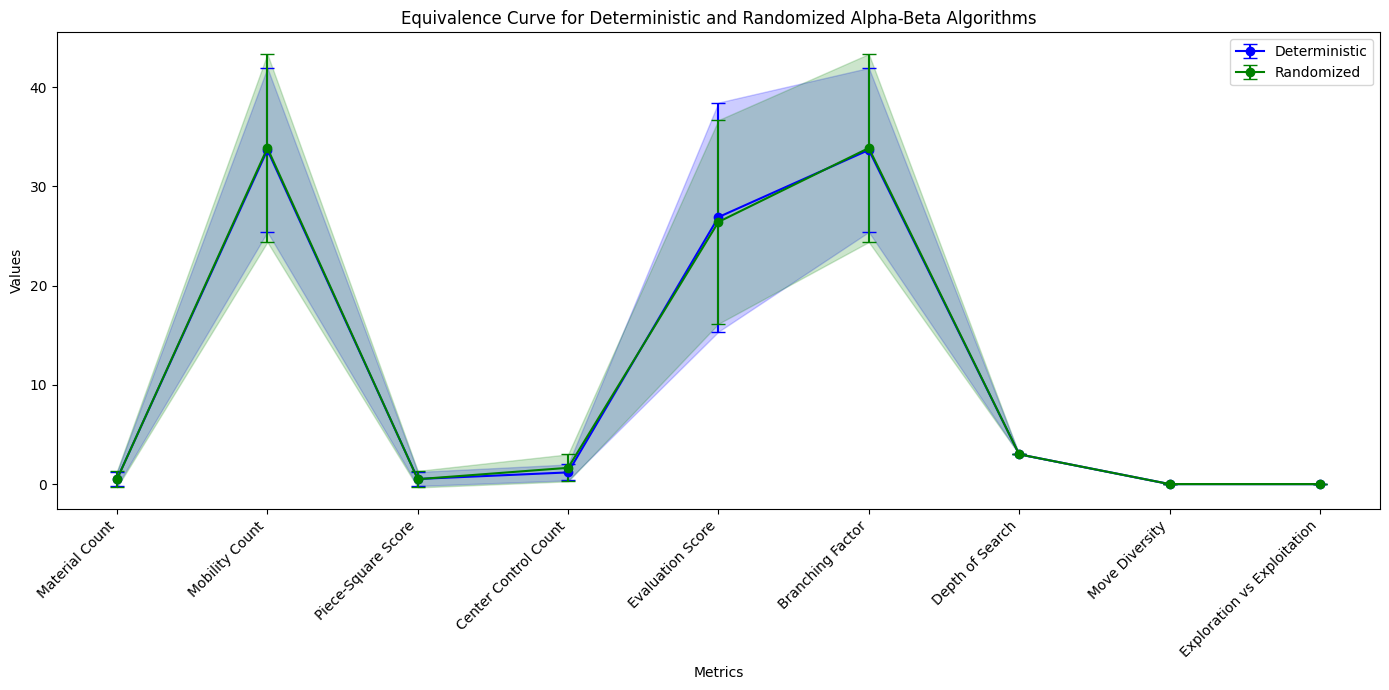

In [ ]:
# Plot equivalence curve
def plot_equivalence_curve(deterministic_mean, deterministic_std, randomized_mean, randomized_std):
    metrics = deterministic_mean.index
    x = np.arange(len(metrics))

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot deterministic means with error bars for std
    ax.errorbar(x, deterministic_mean, yerr=deterministic_std, fmt='o-', label='Deterministic', color='blue', capsize=5)

    # Plot randomized means with error bars for std
    ax.errorbar(x, randomized_mean, yerr=randomized_std, fmt='o-', label='Randomized', color='green', capsize=5)

    # Fill between for deterministic std
    ax.fill_between(x, deterministic_mean - deterministic_std, deterministic_mean + deterministic_std, color='blue', alpha=0.2)

    # Fill between for randomized std
    ax.fill_between(x, randomized_mean - randomized_std, randomized_mean + randomized_std, color='green', alpha=0.2)

    # Add title and labels
    ax.set_title('Equivalence Curve for Deterministic and Randomized Alpha-Beta Algorithms')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45, ha='right')

    # Add legend
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot the comparison metrics
plot_comparison_metrics(deterministic_mean, deterministic_std, randomized_mean, randomized_std)

# Plot the equivalence curve
plot_equivalence_curve(deterministic_mean, deterministic_std, randomized_mean, randomized_std)


In [ ]:
# Perform statistical tests


from scipy.stats import ttest_ind, f_oneway

# Function to perform statistical tests
def perform_statistical_tests(deterministic_metrics, randomized_metrics):
    results = {}
    for metric in deterministic_metrics.index:
        t_stat, p_value_t = ttest_ind(deterministic_data[metric], randomized_data[metric], equal_var=False)
        f_stat, p_value_f = f_oneway(deterministic_data[metric], randomized_data[metric])
        results[metric] = {
            't_stat': t_stat,
            'p_value_t': p_value_t,
            'f_stat': f_stat,
            'p_value_f': p_value_f
        }
    return results

# Perform statistical tests
statistical_results = perform_statistical_tests(deterministic_mean, randomized_mean)

# Display the results
for metric, result in statistical_results.items():
    print(f"{metric}: t-statistic = {result['t_stat']}, p-value (t-test) = {result['p_value_t']}")
    print(f"{metric}: f-statistic = {result['f_stat']}, p-value (F-test) = {result['p_value_f']}\n")




Material Count: t-statistic = 0.1600526270410559, p-value (t-test) = 0.8730810669453657
Material Count: f-statistic = 0.02591302134736669, p-value (F-test) = 0.8723433314609239

Mobility Count: t-statistic = -0.12997014194035506, p-value (t-test) = 0.8967830652761083
Mobility Count: f-statistic = 0.017054000760170974, p-value (F-test) = 0.8962850208326686

Piece-Square Score: t-statistic = 0.1600526270410559, p-value (t-test) = 0.8730810669453657
Piece-Square Score: f-statistic = 0.02591302134736669, p-value (F-test) = 0.8723433314609239

Center Control Count: t-statistic = -2.4524224083673336, p-value (t-test) = 0.01578535059012003
Center Control Count: f-statistic = 6.224017768407304, p-value (F-test) = 0.013756865575871276

Evaluation Score: t-statistic = 0.26669253230467427, p-value (t-test) = 0.7900964013086371
Evaluation Score: f-statistic = 0.07054064054770007, p-value (F-test) = 0.7909391618019582

Branching Factor: t-statistic = -0.12997014194035506, p-value (t-test) = 0.89678

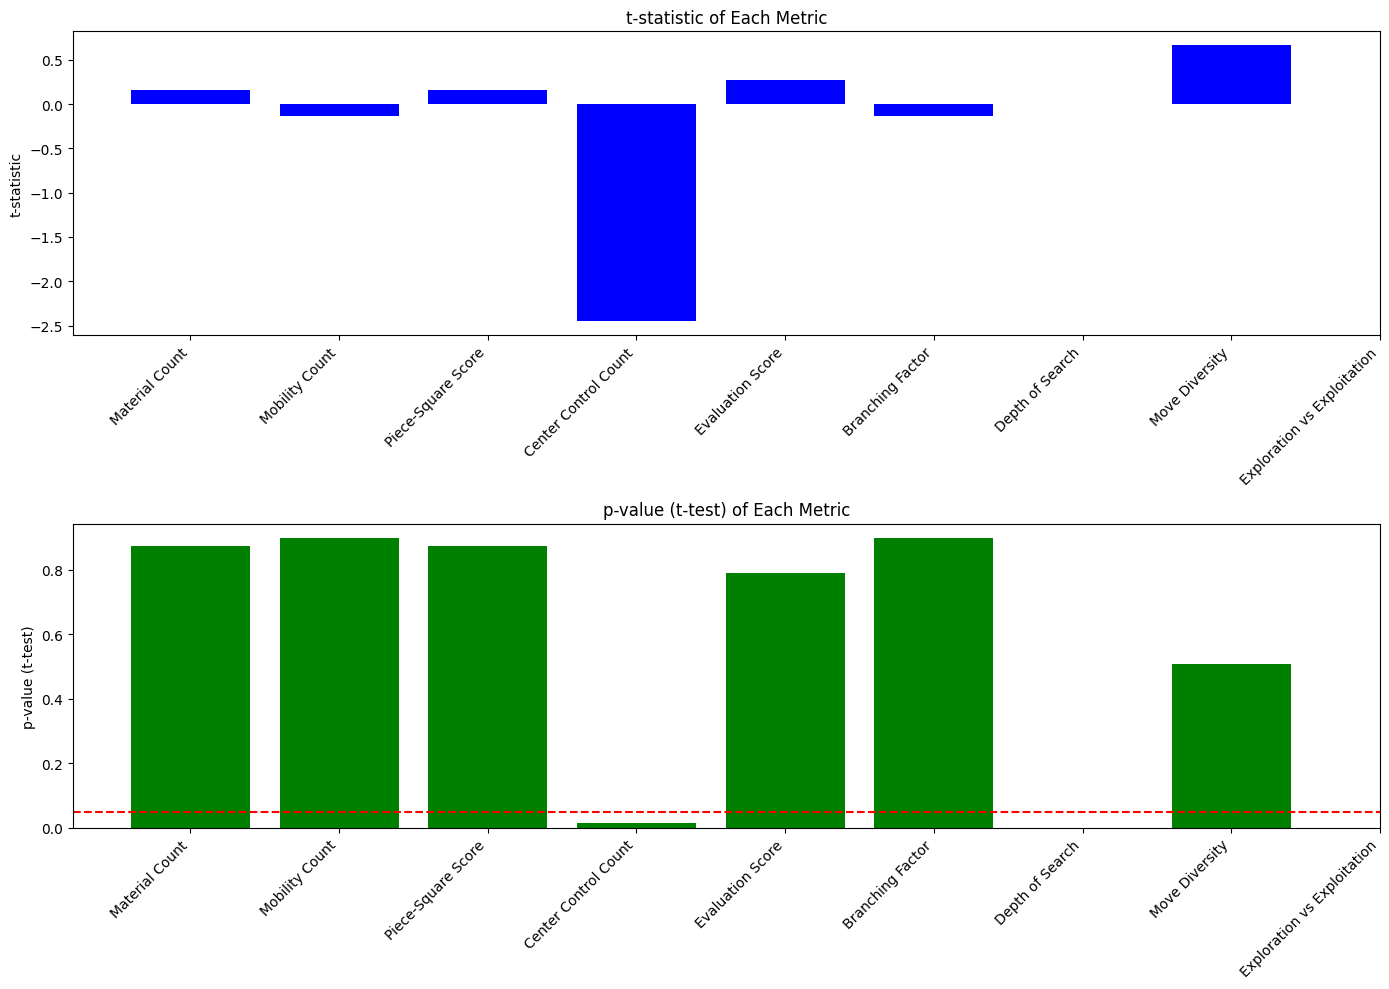

In [ ]:
# Plot statistical analysis results
def plot_statistical_analysis(statistical_results):
    metrics = list(statistical_results.keys())
    t_stats = [result['t_stat'] for result in statistical_results.values()]
    p_values_t = [result['p_value_t'] for result in statistical_results.values()]

    fig, axs = plt.subplots(2, 1, figsize=(14, 10))

    # Plot t-statistics
    axs[0].bar(metrics, t_stats, color='blue')
    axs[0].set_xticks(metrics)
    axs[0].set_xticklabels(metrics, rotation=45, ha='right')
    axs[0].set_ylabel('t-statistic')
    axs[0].set_title('t-statistic of Each Metric')

    # Plot p-values (t-test)
    axs[1].bar(metrics, p_values_t, color='green')
    axs[1].set_xticks(metrics)
    axs[1].set_xticklabels(metrics, rotation=45, ha='right')
    axs[1].axhline(y=0.05, color='r', linestyle='--')
    axs[1].set_ylabel('p-value (t-test)')
    axs[1].set_title('p-value (t-test) of Each Metric')

    plt.tight_layout()
    plt.show()

# Plot statistical analysis results
plot_statistical_analysis(statistical_results)



In [ ]:
# Run additional games to gather more data and plot the equivalence curve again

# Run additional games to gather more data
additional_games = 10
deterministic_results_additional, randomized_results_additional = compare_alpha_beta_kane_versions(kane_deterministic, kane_randomized, games=additional_games)

# Aggregate the additional data
deterministic_mean_additional, deterministic_std_additional, deterministic_data_additional = aggregate_metrics(deterministic_results_additional)
randomized_mean_additional, randomized_std_additional, randomized_data_additional = aggregate_metrics(randomized_results_additional)

# Combine the original and additional data
combined_deterministic_data = pd.concat([deterministic_data, deterministic_data_additional], ignore_index=True)
combined_randomized_data = pd.concat([randomized_data, randomized_data_additional], ignore_index=True)

# Recalculate the means and standard deviations
combined_deterministic_mean, combined_deterministic_std = combined_deterministic_data.mean(), combined_deterministic_data.std()
combined_randomized_mean, combined_randomized_std = combined_randomized_data.mean(), combined_randomized_data.std()

# Display the combined metrics
print("Combined Deterministic Mean Metrics:\n", combined_deterministic_mean)
print("Combined Deterministic Std Metrics:\n", combined_deterministic_std)
print("\nCombined Randomized Mean Metrics:\n", combined_randomized_mean)
print("Combined Randomized Std Metrics:\n", combined_randomized_std)

# Plot the equivalence curve again with combined data
plot_equivalence_curve(combined_deterministic_mean, combined_deterministic_std, combined_randomized_mean, combined_randomized_std)

## Implementation of DQN Abel and Its Derandomization

In [ ]:
# Step 1: Install necessary libraries

!pip install tensorflow numpy pandas matplotlib seaborn chess
!pip install chess [svg]

  Using cached MarkupSafe-2.1.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.0
    Not uninstalling markupsafe at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
ERROR: Invalid requirement: '[svg]'

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Step 2: Define the DQN for Abel
# 2.1: Define the Neural Network for DQN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chess
from collections import deque
import random
from IPython.display import display, clear_output, SVG
import time

# Deep Q-Network model for chess evaluation
class AbelDQN:
    def __init__(self, seed):
        self.model = self.build_model(seed)
    
    def build_model(self, seed):
        np.random.seed(seed)
        tf.random.set_seed(seed)
        model = Sequential([
            Dense(64, activation='relu', input_dim=64),
            Dense(64, activation='relu'),
            Dense(1, activation='linear')
        ])
        model.compile(optimizer='adam', loss='mse')
        return model
    
    def evaluate_board(self, board):
        board_state = self.board_to_input(board)
        return self.model.predict(board_state, verbose=0)[0][0]
    
    def board_to_input(self, board):
        board_state = np.zeros(64)
        for i, piece in board.piece_map().items():
            board_state[i] = piece.piece_type if piece.color == chess.WHITE else -piece.piece_type
        return np.array([board_state])

2024-06-17 02:00:06.615192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 02:00:06.720711: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-17 02:00:06.725502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-17 02:00:06.725519: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
# 2.2 Derandomization functions

def set_random_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)

def softmax_policy(q_values, legal_moves, temperature):
    q_values = np.array(q_values)  # Convert list to numpy array
    exp_values = np.exp(q_values / temperature)
    probabilities = exp_values / np.sum(exp_values)
    return legal_moves[np.argmax(probabilities)]


In [ ]:
# Step 3: Training Functions
# 3.1: Training the Original DQN

def train_dqn(env, num_episodes, seed, temperature):
    set_random_seed(seed)
    dqn_abel = AbelDQN(seed)
    target_network = AbelDQN(seed)
    replay_buffer = deque(maxlen=2000)
    gamma = 0.99
    batch_size = 32
    target_update_freq = 10

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            q_values = [dqn_abel.evaluate_board(env.simulate_move(state, move)) for move in env.legal_moves(state)]
            action = softmax_policy(q_values, env.legal_moves(state), temperature)
            next_state, reward, done = env.step(state, action)
            replay_buffer.append((state, action, reward, next_state, int(done)))
            state = next_state
            
            if len(replay_buffer) > batch_size:
                batch = random.sample(replay_buffer, batch_size)
                update_dqn(dqn_abel, target_network, batch, gamma)
        
        if episode % target_update_freq == 0:
            target_network.model.set_weights(dqn_abel.model.get_weights())
    
    return dqn_abel

def update_dqn(dqn_abel, target_network, batch, gamma):
    states, actions, rewards, next_states, dones = zip(*batch)
    target_q_values = [target_network.evaluate_board(state) for state in next_states]
    targets = rewards + (1 - np.array(dones)) * gamma * np.array(target_q_values)
    states = np.array([dqn_abel.board_to_input(state)[0] for state in states])  # Extract the single array from list
    print(f"States shape: {states.shape}, Targets shape: {targets.shape}")  # Debugging info
    dqn_abel.model.train_on_batch(states, targets)


In [ ]:
# 3.2: Training the Derandomized DQN

# Training the derandomized DQN
def train_abel_dqn_derandomized(env, num_episodes, seed, temperature):
    set_random_seed(seed)
    dqn_abel = AbelDQN(seed)
    target_network = AbelDQN(seed)
    replay_buffer = deque(maxlen=2000)
    gamma = 0.99
    batch_size = 32
    target_update_freq = 10

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            q_values = [dqn_abel.evaluate_board(env.simulate_move(state, move)) for move in env.legal_moves(state)]
            action = softmax_policy(q_values, env.legal_moves(state), temperature)
            next_state, reward, done = env.step(state, action)
            replay_buffer.append((state, action, reward, next_state, int(done)))
            state = next_state
            
            if len(replay_buffer) > batch_size:
                batch = random.sample(replay_buffer, batch_size)
                update_dqn(dqn_abel, target_network, batch, gamma)
        
        if episode % target_update_freq == 0:
            target_network.model.set_weights(dqn_abel.model.get_weights())
    
    return dqn_abel



In [ ]:
# Step 4: Simulation Functions

# 4.1: Environment and Simulation Setup

# Environment simulation
class ChessEnv:
    def reset(self):
        self.board = chess.Board()
        return self.board

    def step(self, state, action):
        self.board.push(action)
        reward = self.evaluate_board(self.board)
        done = self.board.is_game_over()
        next_state = self.board
        return next_state, reward, done

    def legal_moves(self, state):
        return list(state.legal_moves)

    def simulate_move(self, state, move):
        board_copy = state.copy()
        board_copy.push(move)
        return board_copy

    def evaluate_board(self, board):
        # Simplified evaluation for demonstration
        return sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())


In [ ]:
# Function to calculate additional metrics
def calculate_metrics(board):
    material_count = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
    mobility_count = len(list(board.legal_moves))
    piece_square_score = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
    center_control_count = sum(1 if square in [chess.D4, chess.E4, chess.D5, chess.E5] else 0 for square, piece in board.piece_map().items())
    return material_count, mobility_count, piece_square_score, center_control_count

def calculate_additional_metrics(board, move_scores, current_depth, is_exploratory):
    evaluation_score = sum(move_scores) / len(move_scores) if move_scores else 0
    branching_factor = len(list(board.legal_moves))
    depth_of_search = current_depth
    move_diversity = np.var(move_scores) if move_scores else 0
    exploration_vs_exploitation = 1 if is_exploratory else 0
    return evaluation_score, branching_factor, depth_of_search, move_diversity, exploration_vs_exploitation

In [ ]:
# 4.2: Simulate Games using Probabilistic DQN

# Function to play the game with probabilistic DQN

def play_game_dqn_probabilistic(dqn_abel, env, max_moves=55, max_runtime=600, temperature=1.0):
    steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts, move_list = [], [], [], [], [], [], []
    evaluation_scores, branching_factors, depths_of_search, move_diversities, exploration_vs_exploitations = [], [], [], [], []
    step_number = 1
    state = env.reset()
    start_time = time.time()

    while not env.board.is_game_over() and step_number <= max_moves and (time.time() - start_time) <= max_runtime:
        move_start_time = time.time()
        q_values = [dqn_abel.evaluate_board(env.simulate_move(state, move)) for move in env.legal_moves(state)]
        action = softmax_policy(q_values, env.legal_moves(state), temperature)
        next_state, reward, done = env.step(state, action)
        move_end_time = time.time()

        move_list.append(action.uci())
        steps.append(step_number)
        times.append(move_end_time - move_start_time)
        material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(env.board)
        material_counts.append(material_count)
        mobility_counts.append(mobility_count)
        piece_square_scores.append(piece_square_score)
        center_control_counts.append(center_control_count)

        # Collect additional metrics
        move_scores = [dqn_abel.evaluate_board(env.simulate_move(state, move)) for move in env.legal_moves(state)]
        evaluation_score, branching_factor, depth_of_search, move_diversity, exploration_vs_exploitation = calculate_additional_metrics(
            env.board, move_scores, 3, False)  # Depth = 3, is_exploratory = False as placeholder
        evaluation_scores.append(evaluation_score)
        branching_factors.append(branching_factor)
        depths_of_search.append(depth_of_search)
        move_diversities.append(move_diversity)
        exploration_vs_exploitations.append(exploration_vs_exploitation)

        state = next_state
        step_number += 1

        clear_output(wait=True)
        display(SVG(chess.svg.board(board=env.board, size=350)))
        time.sleep(1)
        print(f"Move: {action}, Step: {step_number}, Time: {move_end_time - move_start_time}, Material: {reward}")

    data = {
        'Step': steps,
        'Time': times,
        'Move': move_list,
        'Material Count': material_counts,
        'Mobility Count': mobility_counts,
        'Piece-Square Score': piece_square_scores,
        'Center Control Count': center_control_counts,
        'Evaluation Score': evaluation_scores,
        'Branching Factor': branching_factors,
        'Depth of Search': depths_of_search,
        'Move Diversity': move_diversities,
        'Exploration vs Exploitation': exploration_vs_exploitations
    }
    df = pd.DataFrame(data)
    print(f"Result: {env.board.result()}")
    return df

# Initialize the environment and the network
env = ChessEnv()
dqn_abel_probabilistic = train_dqn(env, num_episodes=5, seed=42, temperature=1.0)

# Simulate and run the probabilistic game
print("Running probabilistic game...")
probabilistic_dqn_results = play_game_dqn_probabilistic(dqn_abel_probabilistic, env, temperature=0.5)

AttributeError: module 'chess' has no attribute 'svg'

In [ ]:
# 4.3: Simulate Games using Derandomized DQN

# Function to play the game with derandomized DQN
def play_game_dqn_derandomized(dqn_abel, env, max_moves=55, max_runtime=600):
    steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts, move_list = [], [], [], [], [], [], []
    evaluation_scores, branching_factors, depths_of_search, move_diversities, exploration_vs_exploitations = [], [], [], [], []
    step_number = 1
    state = env.reset()
    start_time = time.time()

    while not env.board.is_game_over() and step_number <= max_moves and (time.time() - start_time) <= max_runtime:
        move_start_time = time.time()
        q_values = [dqn_abel.evaluate_board(env.simulate_move(state, move)) for move in env.legal_moves(state)]
        action = softmax_policy(q_values, env.legal_moves(state), 1.0)  # Temperature = 1.0 for deterministic
        next_state, reward, done = env.step(state, action)
        move_end_time = time.time()

        move_list.append(action.uci())
        steps.append(step_number)
        times.append(move_end_time - move_start_time)
        material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(env.board)
        material_counts.append(material_count)
        mobility_counts.append(mobility_count)
        piece_square_scores.append(piece_square_score)
        center_control_counts.append(center_control_count)

        # Collect additional metrics
        move_scores = [dqn_abel.evaluate_board(env.simulate_move(state, move)) for move in env.legal_moves(state)]
        evaluation_score, branching_factor, depth_of_search, move_diversity, exploration_vs_exploitation = calculate_additional_metrics(
            env.board, move_scores, 3, False)  # Depth = 3, is_exploratory = False as placeholder
        evaluation_scores.append(evaluation_score)
        branching_factors.append(branching_factor)
        depths_of_search.append(depth_of_search)
        move_diversities.append(move_diversity)
        exploration_vs_exploitations.append(exploration_vs_exploitation)

        state = next_state
        step_number += 1

        # Debugging statement to ensure the loop is progressing
        print(f"Step {step_number}: Move {action.uci()}, Time taken {move_end_time - move_start_time}s")

        # Update display and pause for visualization
        clear_output(wait=True)
        display(SVG(chess.svg.board(board=env.board, size=350)))
        time.sleep(0.1)  # Reduced sleep time for faster execution

    data = {
        'Step': steps,
        'Time': times,
        'Move': move_list,
        'Material Count': material_counts,
        'Mobility Count': mobility_counts,
        'Piece-Square Score': piece_square_scores,
        'Center Control Count': center_control_counts,
        'Evaluation Score': evaluation_scores,
        'Branching Factor': branching_factors,
        'Depth of Search': depths_of_search,
        'Move Diversity': move_diversities,
        'Exploration vs Exploitation': exploration_vs_exploitations
    }
    df = pd.DataFrame(data)
    print(f"Result: {env.board.result()}")
    return df

# Initialize the derandomized network
dqn_abel_derandomized = train_abel_dqn_derandomized(env, num_episodes=5, seed=42, temperature=1.0)

# Simulate and run the derandomized game
print("Running derandomized game...")
derandomized_dqn_results = play_game_dqn_derandomized(dqn_abel_derandomized, env)

States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States shape: (32, 64), Targets shape: (32,)
States sha

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
# Step 5: Collect and Analyze Performance Metrics

def aggregate_dqn_metrics(results):
    numeric_columns = ['Material Count', 'Mobility Count', 'Piece-Square Score', 'Center Control Count',
                       'Evaluation Score', 'Branching Factor', 'Depth of Search', 'Move Diversity',
                       'Exploration vs Exploitation']
    
    aggregated_data = pd.concat(results, ignore_index=True)
    mean_metrics = aggregated_data[numeric_columns].mean()
    std_metrics = aggregated_data[numeric_columns].std()
    
    return mean_metrics, std_metrics, aggregated_data

# Aggregate the results
probabilistic_dqn_mean, probabilistic_dqn_std, probabilistic_dqn_data = aggregate_dqn_metrics([probabilistic_dqn_results])
derandomized_dqn_mean, derandomized_dqn_std, derandomized_dqn_data = aggregate_dqn_metrics([derandomized_dqn_results])

# Display the aggregated metrics
print("Probabilistic DQN Mean Metrics:\n", probabilistic_dqn_mean)
print("Probabilistic DQN Std Metrics:\n", probabilistic_dqn_std)
print("\nDerandomized DQN Mean Metrics:\n", derandomized_dqn_mean)
print("Derandomized DQN Std Metrics:\n", derandomized_dqn_std)

# Display move sequences and non-numeric data
print("\nProbabilistic Moves:\n", probabilistic_dqn_data['Move'])
print("\nDerandomized Moves:\n", derandomized_dqn_data['Move'])

In [ ]:
# Step 6: Generate and Analyze Equivalence Curves

def plot_dqn_equivalence_curve(derandomized_mean, derandomized_std, probabilistic_mean, probabilistic_std):
    metrics = derandomized_mean.index
    x = range(len(metrics))

    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot deterministic means with error bars for std
    ax.errorbar(x, derandomized_mean, yerr=derandomized_std, fmt='o-', label='Derandomized', color='blue', capsize=5)
    ax.errorbar(x, probabilistic_mean, yerr=probabilistic_std, fmt='o-', label='Probabilistic', color='green', capsize=5)

    # Fill between for deterministic std
    ax.fill_between(x, derandomized_mean - derandomized_std, derandomized_mean + derandomized_std, color='blue', alpha=0.2)
    ax.fill_between(x, probabilistic_mean - probabilistic_std, probabilistic_mean + probabilistic_std, color='green', alpha=0.2)

    ax.set_title('Equivalence Curve for Derandomized and Probabilistic DQN')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45, ha='right')

    ax.legend()
    plt.tight_layout()
    plt.show()

# Plot equivalence curve
plot_dqn_equivalence_curve(derandomized_dqn_mean, derandomized_dqn_std, probabilistic_dqn_mean, probabilistic_dqn_std)


In [ ]:
# Step 7: Verification and Conclusion
# 7.1: Simulate Multiple Games

def compare_dqn_versions(derandomized_dqn, probabilistic_dqn, env, games=5, max_moves=55, max_runtime=600, temperature=0.5):
    derandomized_results = []
    probabilistic_results = []

    for _ in range(games):
        # Play game with derandomized DQN
        derandomized_data = play_game_dqn_derandomized(derandomized_dqn, env, max_moves, max_runtime)
        derandomized_results.append(derandomized_data)

        # Play game with probabilistic DQN
        probabilistic_data = play_game_dqn_probabilistic(probabilistic_dqn, env, max_moves, max_runtime, temperature)
        probabilistic_results.append(probabilistic_data)

    return derandomized_results, probabilistic_results

# Compare the derandomized and probabilistic DQN versions over multiple games
derandomized_dqn_results_multiple, probabilistic_dqn_results_multiple = compare_dqn_versions(dqn_abel_derandomized, dqn_abel_probabilistic, env)

In [ ]:
# 7.2: Collect and Aggregate Performance Metrics

# Aggregate the results
derandomized_dqn_mean_multiple, derandomized_dqn_std_multiple, derandomized_dqn_data_multiple = aggregate_dqn_metrics(derandomized_dqn_results_multiple)
probabilistic_dqn_mean_multiple, probabilistic_dqn_std_multiple, probabilistic_dqn_data_multiple = aggregate_dqn_metrics(probabilistic_dqn_results_multiple)

# Display the aggregated metrics
print("Derandomized DQN Mean Metrics (Multiple Games):\n", derandomized_dqn_mean_multiple)
print("Derandomized DQN Std Metrics (Multiple Games):\n", derandomized_dqn_std_multiple)
print("\nProbabilistic DQN Mean Metrics (Multiple Games):\n", probabilistic_dqn_mean_multiple)
print("Probabilistic DQN Std Metrics (Multiple Games):\n", probabilistic_dqn_std_multiple)


In [ ]:
# 7.3: Generate and Analyze Equivalence Curves

# Plot equivalence curve
plot_dqn_equivalence_curve(derandomized_dqn_mean_multiple, derandomized_dqn_std_multiple, probabilistic_dqn_mean_multiple, probabilistic_dqn_std_multiple)


In [ ]:
# 7.4: Run Additional Games to Gather More Data

# Run additional games to gather more data
# Run additional games to gather more data
additional_games = 100
derandomized_dqn_results_additional, probabilistic_dqn_results_additional = compare_dqn_versions(dqn_abel_derandomized, dqn_abel_probabilistic, env, games=additional_games, temperature=0.5)

# Aggregate the additional data
derandomized_dqn_mean_additional, derandomized_dqn_std_additional, derandomized_dqn_data_additional = aggregate_dqn_metrics(derandomized_dqn_results_additional)
probabilistic_dqn_mean_additional, probabilistic_dqn_std_additional, probabilistic_dqn_data_additional = aggregate_dqn_metrics(probabilistic_dqn_results_additional)

# Combine the original and additional data
combined_derandomized_dqn_data = pd.concat([derandomized_dqn_data_multiple, derandomized_dqn_data_additional], ignore_index=True)
combined_probabilistic_dqn_data = pd.concat([probabilistic_dqn_data_multiple, probabilistic_dqn_data_additional], ignore_index=True)

# Recalculate the means and standard deviations
combined_derandomized_dqn_mean, combined_derandomized_dqn_std = combined_derandomized_dqn_data.mean(), combined_derandomized_dqn_data.std()
combined_probabilistic_dqn_mean, combined_probabilistic_dqn_std = combined_probabilistic_dqn_data.mean(), combined_probabilistic_dqn_data.std()

# Display the combined metrics
print("Combined Derandomized DQN Mean Metrics:\n", combined_derandomized_dqn_mean)
print("Combined Derandomized DQN Std Metrics:\n", combined_derandomized_dqn_std)
print("\nCombined Probabilistic DQN Mean Metrics:\n", combined_probabilistic_dqn_mean)
print("Combined Probabilistic DQN Std Metrics:\n", combined_probabilistic_dqn_std)

# Plot combined equivalence curve
plot_dqn_equivalence_curve(combined_derandomized_dqn_mean, combined_derandomized_dqn_std, combined_probabilistic_dqn_mean, combined_probabilistic_dqn_std)

In [ ]:
# Step 8: Perform Statistical Tests

from scipy.stats import ttest_ind, f_oneway

def perform_statistical_tests(derandomized_metrics, probabilistic_metrics):
    results = {}
    for metric in derandomized_metrics.index:
        t_stat, p_value_t = ttest_ind(derandomized_metrics[metric], probabilistic_metrics[metric], equal_var=False)
        f_stat, p_value_f = f_oneway(derandomized_metrics[metric], probabilistic_metrics[metric])
        results[metric] = {
            't_stat': t_stat,
            'p_value_t': p_value_t,
            'f_stat': f_stat,
            'p_value_f': p_value_f
        }
    return results

# Perform statistical tests
statistical_results = perform_statistical_tests(combined_derandomized_dqn_mean, combined_probabilistic_dqn_mean)

# Display the results
for metric, result in statistical_results.items():
    print(f"{metric}: t-statistic = {result['t_stat']}, p-value (t-test) = {result['p_value_t']}")
    print(f"{metric}: f-statistic = {result['f_stat']}, p-value (F-test) = {result['p_value_f']}\n")



In [ ]:
# Plot statistical analysis results
def plot_statistical_analysis(statistical_results):
    metrics = list(statistical_results.keys())
    t_stats = [result['t_stat'] for result in statistical_results.values()]
    p_values_t = [result['p_value_t'] for result in statistical_results.values()]

    fig, axs = plt.subplots(2, 1, figsize=(14, 10))

    # Plot t-statistics
    axs[0].bar(metrics, t_stats, color='blue')
    axs[0].set_xticks(metrics)
    axs[0].set_xticklabels(metrics, rotation=45, ha='right')
    axs[0].set_ylabel('t-statistic')
    axs[0].set_title('t-statistic of Each Metric')

    # Plot p-values (t-test)
    axs[1].bar(metrics, p_values_t, color='green')
    axs[1].set_xticks(metrics)
    axs[1].set_xticklabels(metrics, rotation=45, ha='right')
    axs[1].axhline(y=0.05, color='r', linestyle='--')
    axs[1].set_ylabel('p-value (t-test)')
    axs[1].set_title('p-value (t-test) of Each Metric')

    plt.tight_layout()
    plt.show()

# Plot statistical analysis results
plot_statistical_analysis(statistical_results)


In [ ]:
# Calculate the equivalence score
def calculate_equivalence_score(deterministic_metrics, probabilistic_metrics):
    diff_sum = 0
    for metric in deterministic_metrics.index:
        diff_sum += np.sum(np.abs(deterministic_metrics[metric] - probabilistic_metrics[metric]) / (np.abs(deterministic_metrics[metric]) + np.abs(probabilistic_metrics[metric])))
    equivalence_score = diff_sum / len(deterministic_metrics.index)
    return equivalence_score

# Calculate the equivalence score for DQN
equivalence_score_dqn = calculate_equivalence_score(combined_derandomized_dqn_mean, combined_probabilistic_dqn_mean)
print(f"Equivalence Score for DQN: {equivalence_score_dqn}")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6f51e1a-d40a-494a-8398-36807e7a81cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>